# Mean Squared Error Function

Log-Loss vs Mean Squared Error
In the previous section, Luis taught you about the log-loss function. There are many other error functions used for neural networks. Let me teach you another one, called the mean squared error. As the name says, this one is the mean of the squares of the differences between the predictions and the labels. In the following section I'll go over it in detail, then we'll get to implement backpropagation with it on the same student admissions dataset.

And as a bonus, we'll be implementing this in a very effective way using matrix multiplication with NumPy!



# Gradient Descent

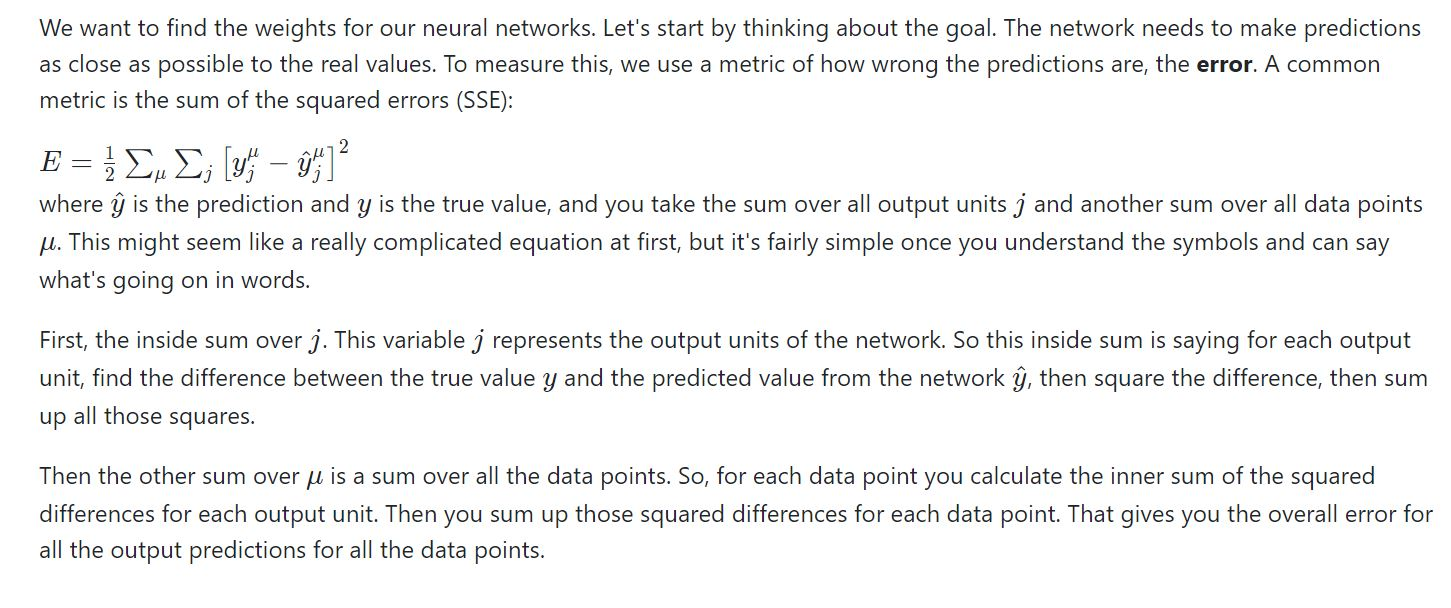

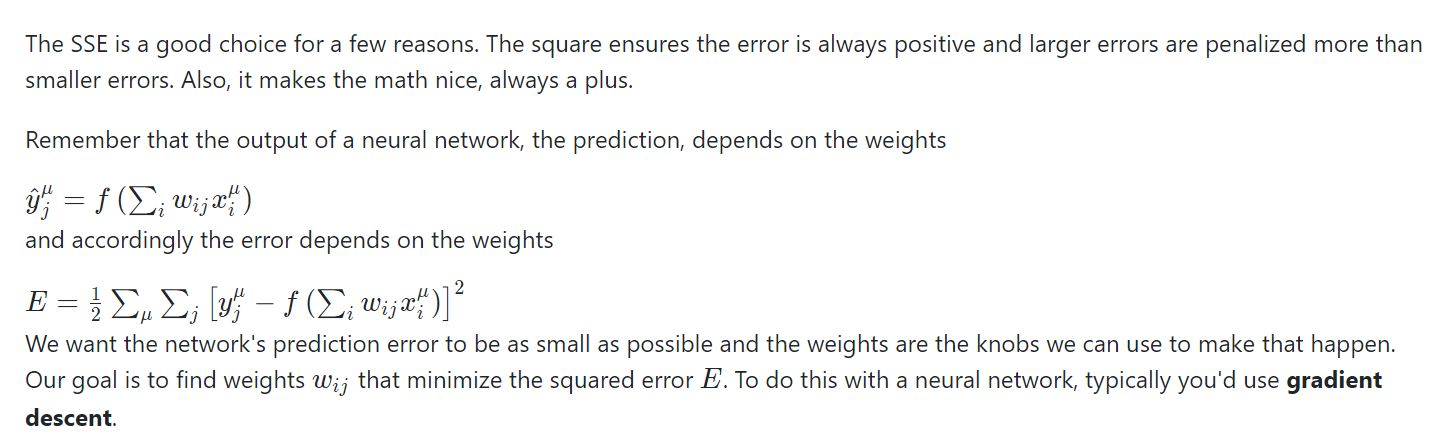

As Luis said, with gradient descent, we take multiple small steps towards our goal. In this case, we want to change the weights in steps that reduce the error. Continuing the analogy, the error is our mountain and we want to get to the bottom. Since the fastest way down a mountain is in the steepest direction, the steps taken should be in the direction that minimizes the error the most. We can find this direction by calculating the gradient of the squared error.

Gradient is another term for rate of change or slope. If you need to brush up on this concept, check out Khan Academy's great lectures on the topic.

To calculate a rate of change, we turn to calculus, specifically derivatives. A derivative of a function f(x)f(x) gives you another function f&#x27;(x)f 
′
 (x) that returns the slope of f(x)f(x) at point xx. For example, consider f(x)=x^2f(x)=x 
2
 . The derivative of x^2x 
2
  is f&#x27;(x) = 2xf 
′
 (x)=2x. So, at x = 2x=2, the slope is f&#x27;(2) = 4f 
′
 (2)=4. Plotting this out, it looks like:





The gradient is just a derivative generalized to functions with more than one variable. We can use calculus to find the gradient at any point in our error function, which depends on the input weights. You'll see how the gradient descent step is derived on the next page.

Below I've plotted an example of the error of a neural network with two inputs, and accordingly, two weights. You can read this like a topographical map where points on a contour line have the same error and darker contour lines correspond to larger errors.

At each step, you calculate the error and the gradient, then use those to determine how much to change each weight. Repeating this process will eventually find weights that are close to the minimum of the error function, the black dot in the middle.



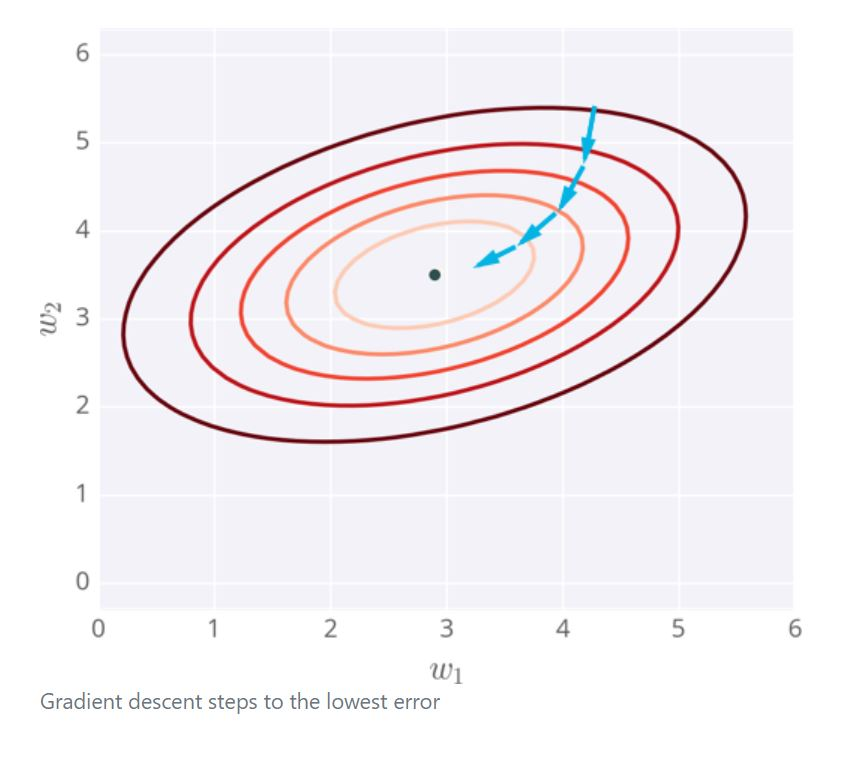

## Caveats

Since the weights will just go wherever the gradient takes them, they can end up where the error is low, but not the lowest. These spots are called local minima. If the weights are initialized with the wrong values, gradient descent could lead the weights into a local minimum, illustrated below.

There are methods to avoid this, such as using momentum.



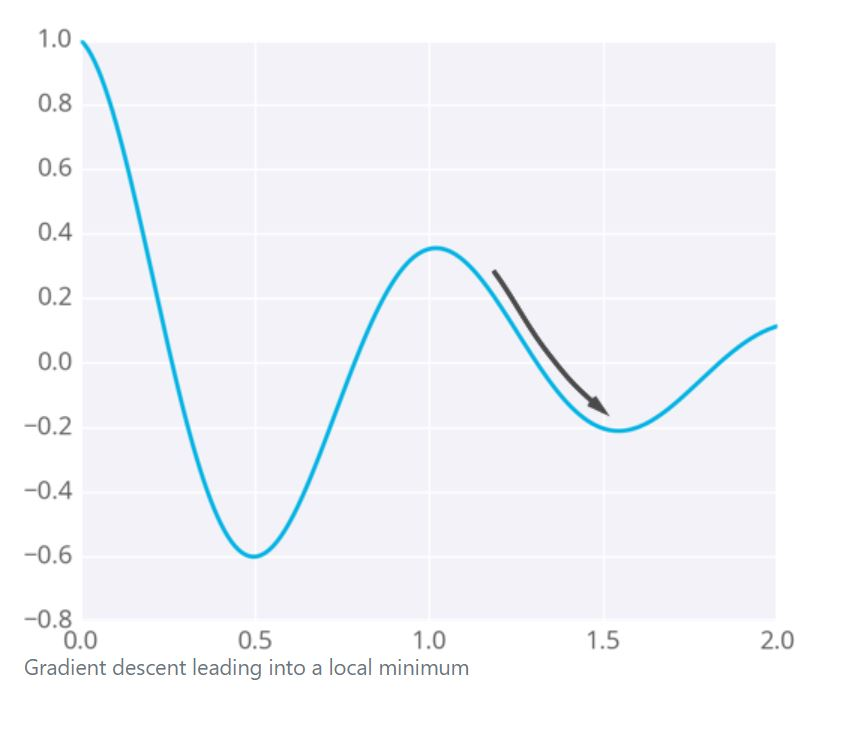

# Gradient Descent Math

see video to understand

# Gradient Descent Code

code for the case of only one output unit. We'll also be using the sigmoid as the activation function f(h)f(h).



In [4]:
# Defining the sigmoid function for activations
def sigmoid(x):
    return 1/(1+np.exp(-x))

# Derivative of the sigmoid function
def sigmoid_prime(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Input data
x = np.array([0.1, 0.3])
# Target
y = 0.2
# Input to output weights
weights = np.array([-0.8, 0.5])

# The learning rate, eta in the weight step equation
learnrate = 0.5

# the linear combination performed by the node (h in f(h) and f'(h))
h = x[0]*weights[0] + x[1]*weights[1]
# or h = np.dot(x, weights)

# The neural network output (y-hat)
nn_output = sigmoid(h)

# output error (y - y-hat)
error = y - nn_output

# output gradient (f'(h))
output_grad = sigmoid_prime(h)

# error term (lowercase delta)
error_term = error * output_grad

# Gradient descent step 
del_w = [ learnrate * error_term * x[0],
          learnrate * error_term * x[1]]
# or del_w = learnrate * error_term * x

Another code for all multi outputs (NOT SURE)

In [5]:
import numpy as np

def sigmoid(x):
    """
    Calculate sigmoid
    """
    return 1/(1+np.exp(-x))

def sigmoid_prime(x):
    """
    # Derivative of the sigmoid function
    """
    return sigmoid(x) * (1 - sigmoid(x))

learnrate = 0.5
x = np.array([1, 2, 3, 4])
y = np.array(0.5)

# Initial weights
w = np.array([0.5, -0.5, 0.3, 0.1])

### Calculate one gradient descent step for each weight
### Note: Some steps have been consilated, so there are
###       fewer variable names than in the above sample code

# TODO: Calculate the node's linear combination of inputs and weights
h = np.dot(x, w)

# TODO: Calculate output of neural network
nn_output = sigmoid(h)

# TODO: Calculate error of neural network
error = y - nn_output

# TODO: Calculate the error term
#       Remember, this requires the output gradient, which we haven't
#       specifically added a variable for.
error_term = error * sigmoid_prime(h)
# Note: The sigmoid_prime function calculates sigmoid(h) twice,
#       but you've already calculated it once. You can make this
#       code more efficient by calculating the derivative directly
#       rather than calling sigmoid_prime, like this:
# error_term = error * nn_output * (1 - nn_output)

# TODO: Calculate change in weights
del_w = learnrate * error_term * x

print('Neural Network output:')
print(nn_output)
print('Amount of Error:')
print(error)
print('Change in Weights:')
print(del_w)

Neural Network output:
0.6899744811276125
Amount of Error:
-0.1899744811276125
Change in Weights:
[-0.02031869 -0.04063738 -0.06095608 -0.08127477]


# Implementing Gradient Descent

## Mean Square Error

We're going to make a small change to how we calculate the error here. Instead of the SSE, we're going to use the mean of the square errors (MSE). Now that we're using a lot of data, summing up all the weight steps can lead to really large updates that make the gradient descent diverge. To compensate for this, you'd need to use a quite small learning rate. Instead, we can just divide by the number of records in our data, mm to take the average. This way, no matter how much data we use, our learning rates will typically be in the range of 0.01 to 0.001. Then, we can use the MSE (shown below) to calculate the gradient and the result is the same as before, just averaged instead of summed.

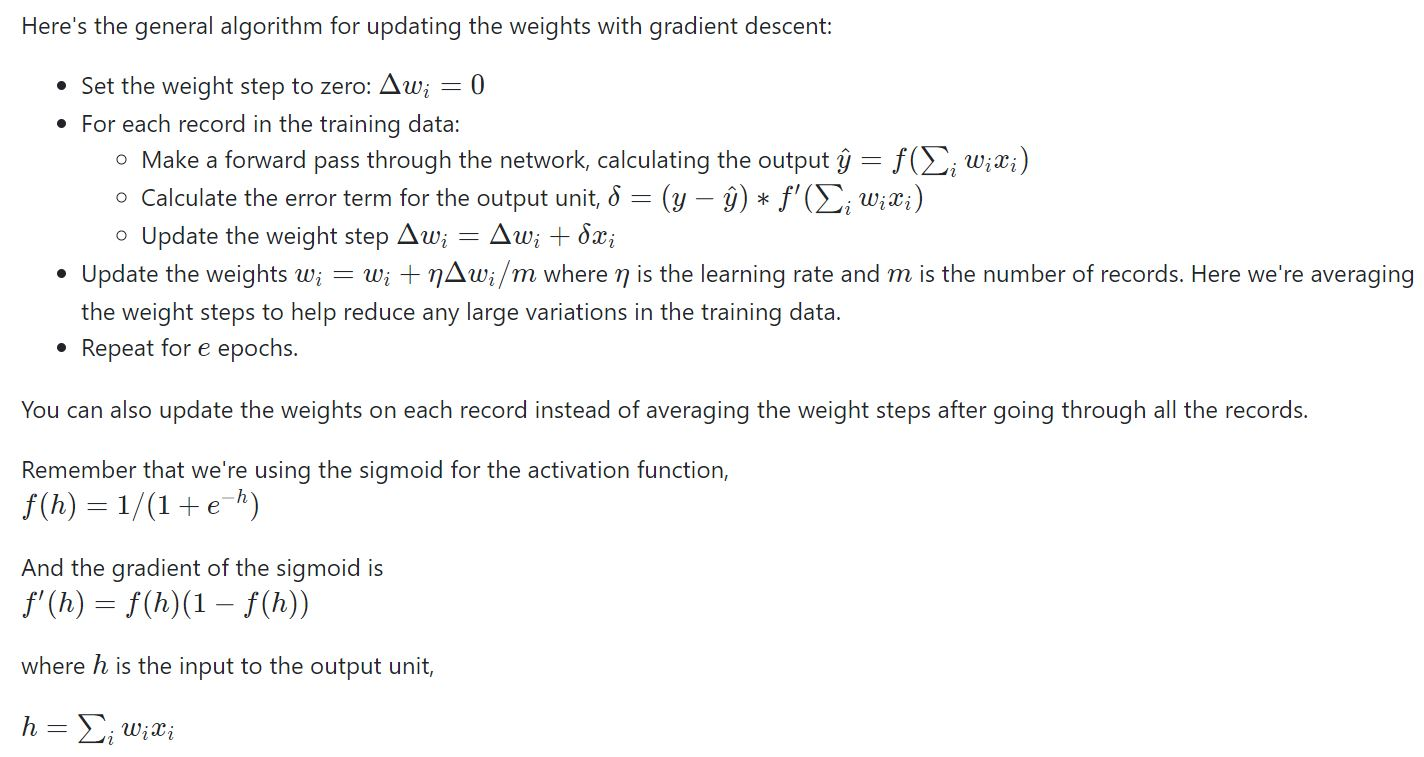

## Implementing with NumPy

For the most part, this is pretty straightforward with NumPy.

First, you'll need to initialize the weights. We want these to be small such that the input to the sigmoid is in the linear region near 0 and not squashed at the high and low ends. It's also important to initialize them randomly so that they all have different starting values and diverge, breaking symmetry. So, we'll initialize the weights from a normal distribution centered at 0. A good value for the scale is 1/sqrt(n)
​	
  where n is the number of input units. This keeps the input to the sigmoid low for increasing numbers of input units.

weights = np.random.normal(scale=1/n_features**.5, size=n_features)

NumPy provides a function np.dot() that calculates the dot product of two arrays, which conveniently calculates hh for us. The dot product multiplies two arrays element-wise, the first element in array 1 is multiplied by the first element in array 2, and so on. Then, each product is summed.

#input to the output layer
output_in = np.dot(weights, inputs)

And finally, we can update \Delta w_iΔw 
i
​	
  and w_iw 
i
​	
  by incrementing them with weights += ... which is shorthand for weights = weights + ....

Efficiency tip!
You can save some calculations since we're using a sigmoid here. For the sigmoid function, f&#x27;(h) = f(h) (1 - f(h))f 
′
 (h)=f(h)(1−f(h)). That means that once you calculate f(h)f(h), the activation of the output unit, you can use it to calculate the gradient for the error gradient

## Exercise

Programming exercise
Below, you'll implement gradient descent and train the network on the admissions data. Your goal here is to train the network until you reach a minimum in the mean square error (MSE) on the training set. You need to implement:

The network output: output.
The output error: error.
The error term: error_term.
Update the weight step: del_w +=.
Update the weights: weights +=.
After you've written these parts, run the training by pressing "Test Run". The MSE will print out, as well as the accuracy on a test set, the fraction of correctly predicted admissions.

Feel free to play with the hyperparameters and see how it changes the MSE.



In [6]:
# DATA PREPARATION
import numpy as np
import pandas as pd

admissions = pd.read_csv('binary.csv')

# Make dummy variables for rank
data = pd.concat([admissions, pd.get_dummies(admissions['rank'], prefix='rank')], axis=1)
data = data.drop('rank', axis=1)

# Standarize features
for field in ['gre', 'gpa']:
    mean, std = data[field].mean(), data[field].std()
    data.loc[:,field] = (data[field]-mean)/std
    
# Split off random 10% of the data for testing
np.random.seed(42)
sample = np.random.choice(data.index, size=int(len(data)*0.9), replace=False)
data, test_data = data.ix[sample], data.drop(sample)

# Split into features and targets
features, targets = data.drop('admit', axis=1), data['admit']
features_test, targets_test = test_data.drop('admit', axis=1), test_data['admit']

KeyError: 'rank'

GRADIENT. PY  QUESTION

import numpy as np
import pandas as pd

admissions = pd.read_csv('binary.csv')

#Make dummy variables for rank
data = pd.concat([admissions, pd.get_dummies(admissions['rank'], prefix='rank')], axis=1)
data = data.drop('rank', axis=1)

#Standarize features
for field in ['gre', 'gpa']:
    mean, std = data[field].mean(), data[field].std()
    data.loc[:,field] = (data[field]-mean)/std
    
#Split off random 10% of the data for testing
np.random.seed(42)
sample = np.random.choice(data.index, size=int(len(data)*0.9), replace=False)
data, test_data = data.ix[sample], data.drop(sample)

#Split into features and targets
features, targets = data.drop('admit', axis=1), data['admit']
features_test, targets_test = test_data.drop('admit', axis=1), test_data['admit']

In [7]:
import numpy as np
from data_prep import features, targets, features_test, targets_test


def sigmoid(x):
    """
    Calculate sigmoid
    """
    return 1 / (1 + np.exp(-x))

# TODO: We haven't provided the sigmoid_prime function like we did in
#       the previous lesson to encourage you to come up with a more
#       efficient solution. If you need a hint, check out the comments
#       in solution.py from the previous lecture.

# Use to same seed to make debugging easier
np.random.seed(42)

n_records, n_features = features.shape
last_loss = None

# Initialize weights
weights = np.random.normal(scale=1 / n_features**.5, size=n_features)

# Neural Network hyperparameters
epochs = 1000
learnrate = 0.5

for e in range(epochs):
    del_w = np.zeros(weights.shape)
    for x, y in zip(features.values, targets):
        # Loop through all records, x is the input, y is the target

        # Activation of the output unit
        #   Notice we multiply the inputs and the weights here 
        #   rather than storing h as a separate variable 
        output = sigmoid(np.dot(x, weights))

        # The error, the target minus the network output
        error = y - output

        # The error term
        #   Notice we calulate f'(h) here instead of defining a separate
        #   sigmoid_prime function. This just makes it faster because we
        #   can re-use the result of the sigmoid function stored in
        #   the output variable
        error_term = error * output * (1 - output)

        # The gradient descent step, the error times the gradient times the inputs
        del_w += error_term * x

    # Update the weights here. The learning rate times the 
    # change in weights, divided by the number of records to average
    weights += learnrate * del_w / n_records

    # Printing out the mean square error on the training set
    if e % (epochs / 10) == 0:
        out = sigmoid(np.dot(features, weights))
        loss = np.mean((out - targets) ** 2)
        if last_loss and last_loss < loss:
            print("Train loss: ", loss, "  WARNING - Loss Increasing")
        else:
            print("Train loss: ", loss)
        last_loss = loss


# Calculate accuracy on test data
tes_out = sigmoid(np.dot(features_test, weights))
predictions = tes_out > 0.5
accuracy = np.mean(predictions == targets_test)
print("Prediction accuracy: {:.3f}".format(accuracy))

ModuleNotFoundError: No module named 'data_prep'

# Multilayer Perceptrons

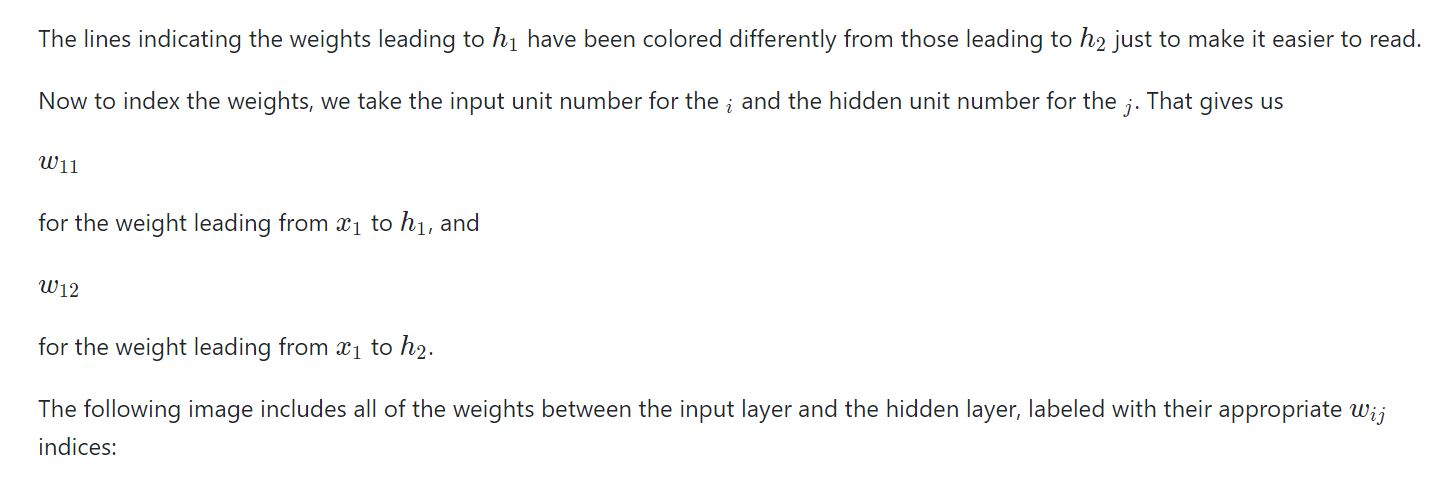

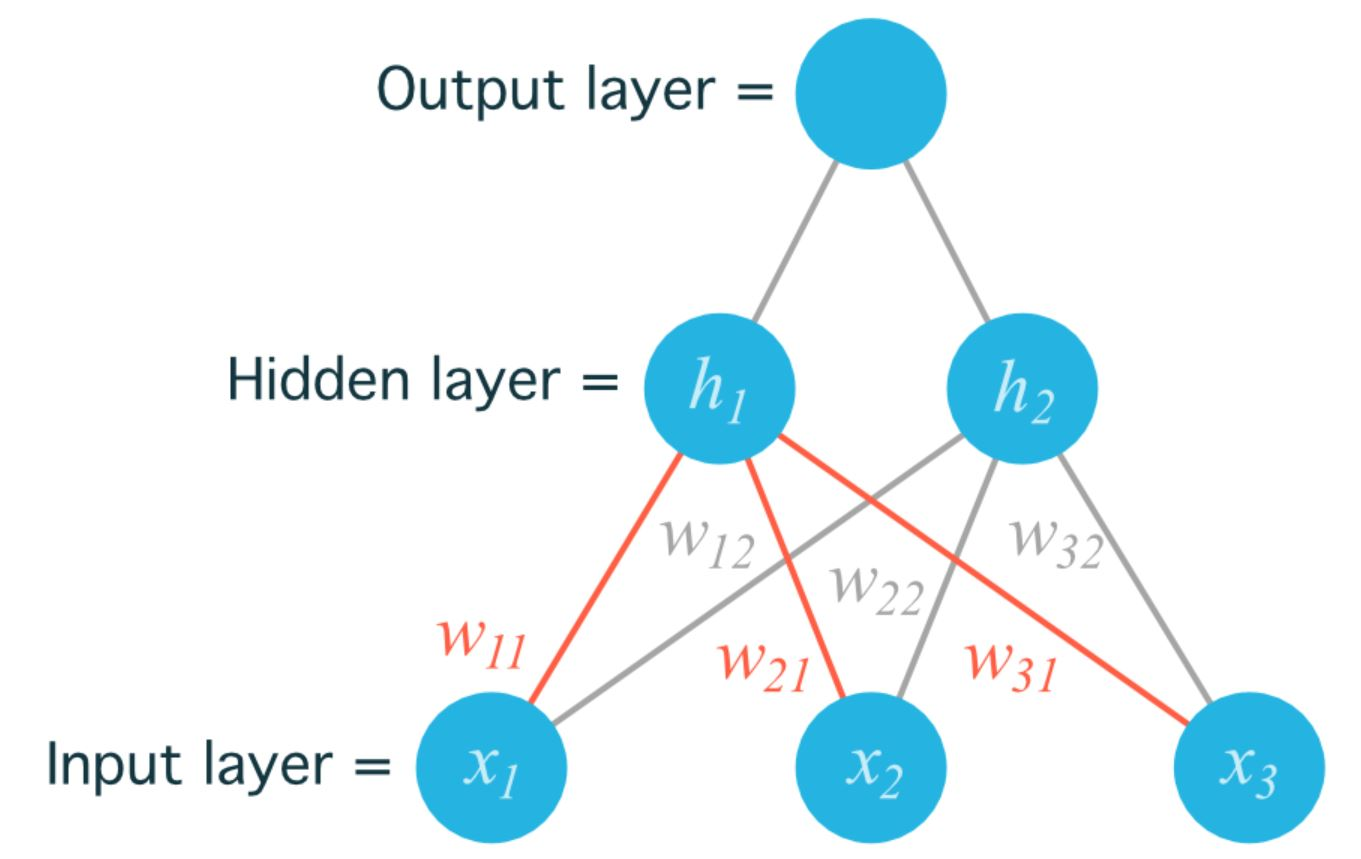

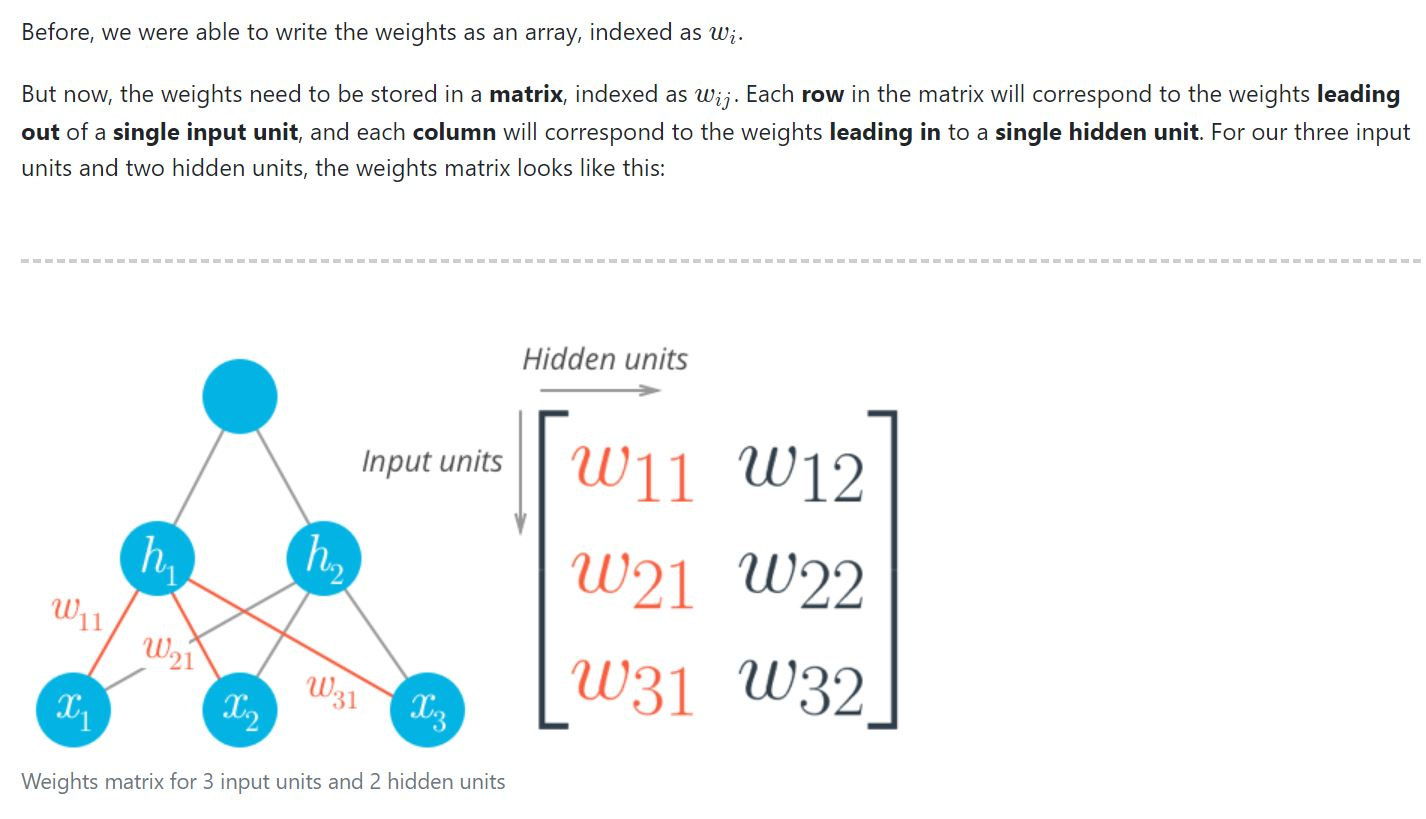

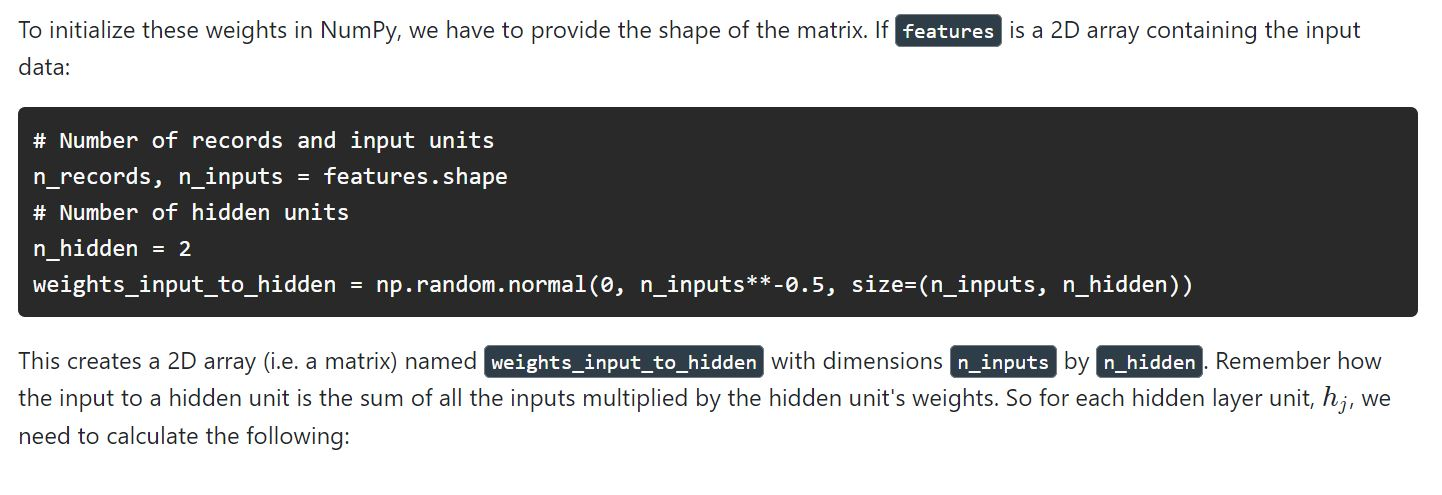

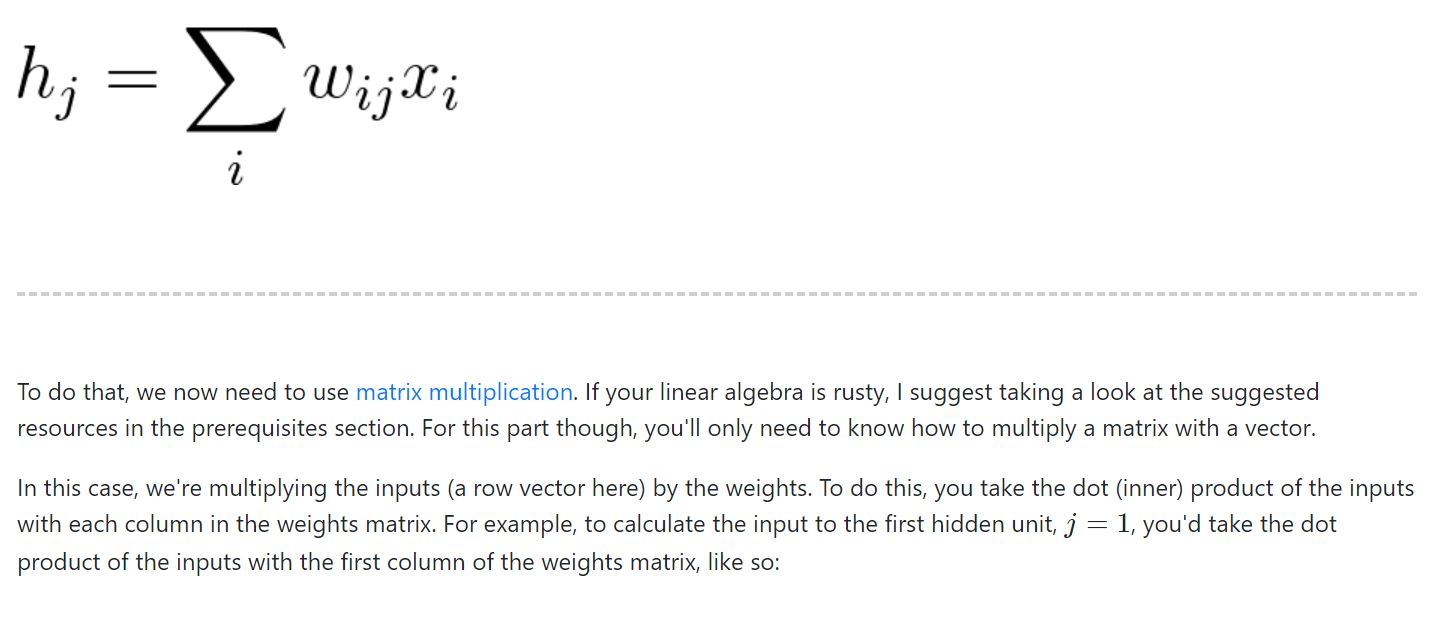

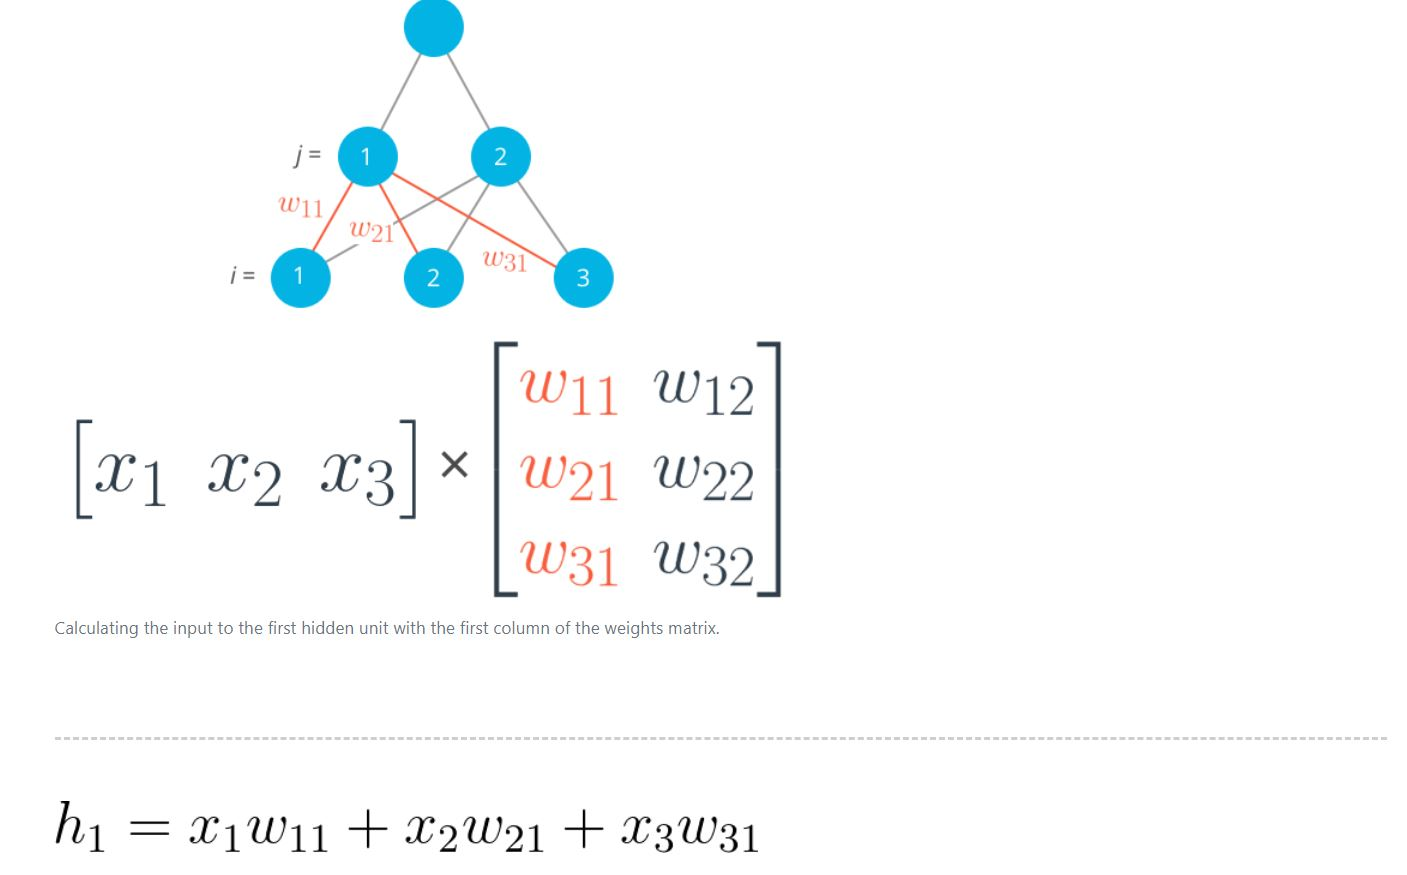

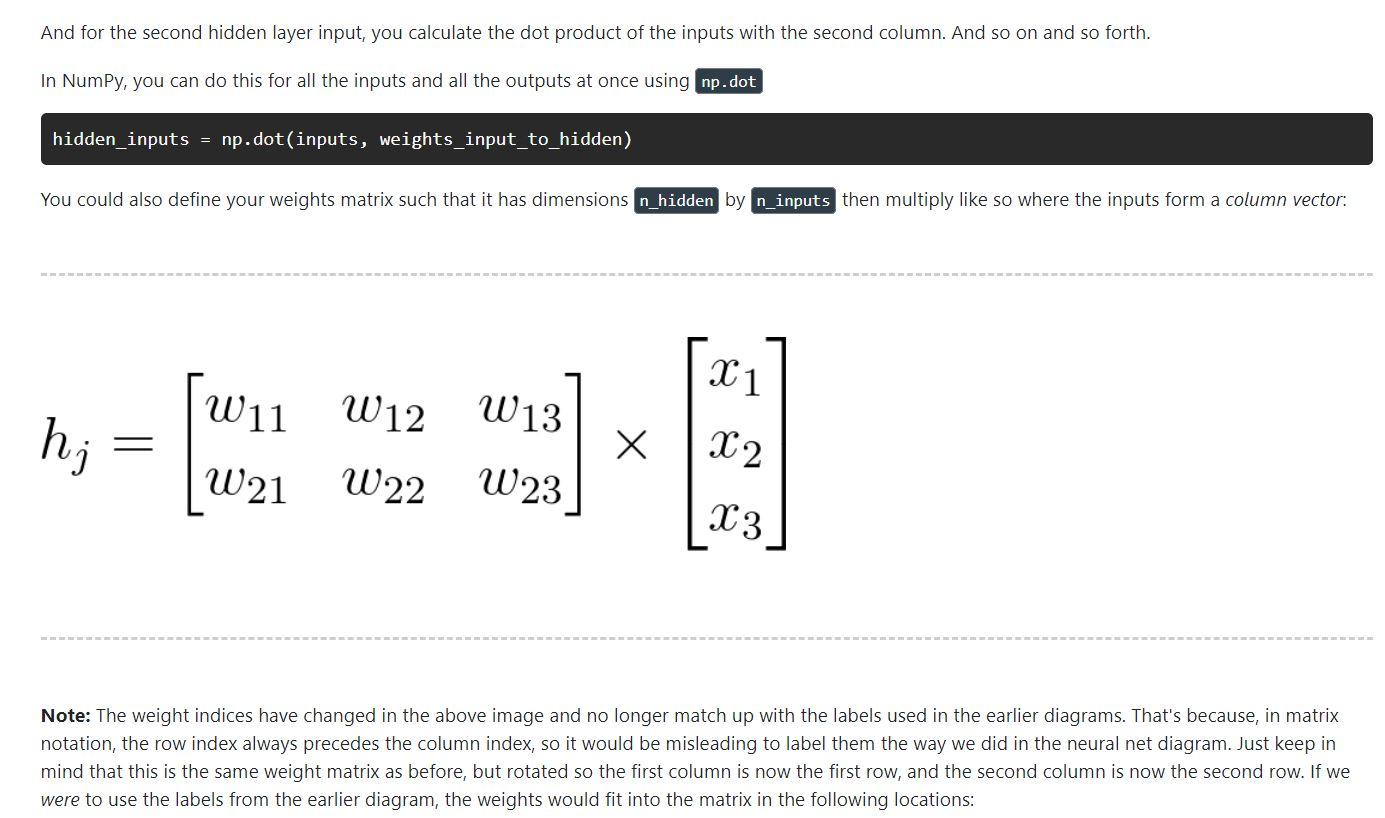

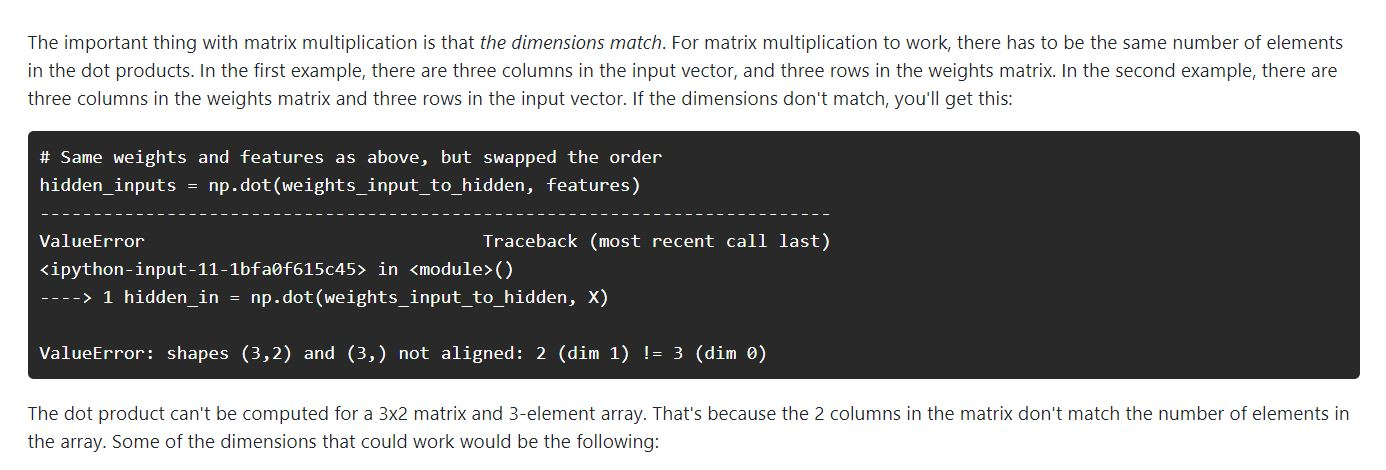

## Programming quiz

Below, you'll implement a forward pass through a 4x3x2 network, with sigmoid activation functions for both layers.

Things to do:

1) Calculate the input to the hidden layer.

2) Calculate the hidden layer output.

3) Calculate the input to the output layer.

4) Calculate the output of the network.


QUESTION    ==========================================================================================================
import numpy as np

def sigmoid(x):
    """
    Calculate sigmoid
    """
    return 1/(1+np.exp(-x))

#Network size
N_input = 4
N_hidden = 3
N_output = 2

np.random.seed(42)
#Make some fake data
X = np.random.randn(4)

weights_input_to_hidden = np.random.normal(0, scale=0.1, size=(N_input, N_hidden))
weights_hidden_to_output = np.random.normal(0, scale=0.1, size=(N_hidden, N_output))


#TODO: Make a forward pass through the network

hidden_layer_in = None
hidden_layer_out = None

print('Hidden-layer Output:')
print(hidden_layer_out)

output_layer_in = None
output_layer_out = None

print('Output-layer Output:')
print(output_layer_out)


In [8]:
import numpy as np

def sigmoid(x):
    """
    Calculate sigmoid
    """
    return 1/(1+np.exp(-x))

# Network size
N_input = 4
N_hidden = 3
N_output = 2

np.random.seed(42)
# Make some fake data
X = np.random.randn(4)

weights_input_to_hidden = np.random.normal(0, scale=0.1, size=(N_input, N_hidden))
weights_hidden_to_output = np.random.normal(0, scale=0.1, size=(N_hidden, N_output))


# TODO: Make a forward pass through the network

hidden_layer_in = np.dot(X, weights_input_to_hidden)
hidden_layer_out = sigmoid(hidden_layer_in)

print('Hidden-layer Output:')
print(hidden_layer_out)

output_layer_in = np.dot(hidden_layer_out, weights_hidden_to_output)
output_layer_out = sigmoid(output_layer_in)

print('Output-layer Output:')
print(output_layer_out)


Hidden-layer Output:
[0.41492192 0.42604313 0.5002434 ]
Output-layer Output:
[0.49815196 0.48539772]
